In [154]:
import numpy as np
import re

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import csv
plt.style.use('seaborn')

In [155]:
## drop unnecessary stuff
raw_df = pd.read_csv('erg_f21.csv')
df = raw_df.drop(['num','Timestamp', 'SD', 'Questions, comments? other?', 'Did you send a pic of your time trial splits to one of the coaches?'], axis=1)



In [156]:
df = df.drop_duplicates()
df = df.rename(columns={"Time (MM:SS:X) (PLEASE USE ONLYS COLONS (:) not DECIMALS!!). 2:30:0 NOT 2:30.0!!!":"overall_time", "Split 1 (MM:SS:X)": "split_1", "Split 2 (MM:SS:X)": "split_2", "Split 3 (MM:SS:X)":"split_3", "Split 4 (MM:SS:X)":"split_4", "Split 5 (MM:SS:X)":"split_5"})



,Name,Pic received?,overall_time,Side,Weight,split_1,split_2,split_3,split_4,split_5
0,Shine Lee,Rosa,3:00:0,Left,154,2:49.5,2:46:5,2:55:0,3:10:0,3:19:0
1,Daniel Shevelev,NaN,2:38:5,Right,170,2:27.5,2:24:0,2:40:0,2:50:0,2:51:1
2,Ethan Garcia,NaN,2:16:9,Right,144,02:09.00,2:05:0,2:11:0,2:22:0,2:37:5
3,Yuki Schwab,Angie,2:56:5,Right,113,00:34.03,0:34:6,0:35:2,0:35:5,0:36:9
4,Anson Wong,Angie,2:37:5,Right,122,02:32.00,2:31:0,2:36:0,2:42:0,2:45:0


In [157]:
## finds ppl who didnt submit
submitted = np.array(df['Name'])
# insert roster thing here

In [158]:
## finds ppl who didnt submit a pic
no_pic = df[df['Pic received?'].isna()]
no_pic['Name']

1     Daniel Shevelev
2        Ethan Garcia
5          Luke Chang
37       Kathlee Wong
38         Yuqing Qiu
39        Vicky White
40     Daniell Galang
41    Lauren Trankiem
Name: Name, dtype: object

In [159]:
# convert splits
for i in np.arange(0,6):
    col_name = 'split_%s' % i
    if i == 0:
        col_name = 'overall_time'
    time_col = np.array(df[col_name])
    new_time = []
    for j in np.arange(len(time_col)):
        split_str = time_col[j]
        arr = np.array(split_str.split(':')).astype(np.double)
        seconds = arr.item(0)*60 + arr.item(1)
        new_time = np.append(seconds, new_time)
    df = df.drop([col_name], axis=1)
    df[col_name+'_seconds'] = new_time
df.head()

,Name,Pic received?,Side,Weight,overall_time_seconds,split_1_seconds,split_2_seconds,split_3_seconds,split_4_seconds,split_5_seconds
0,Shine Lee,Rosa,Left,154,166.0,155.5,162.0,172.0,173.0,169.0
1,Daniel Shevelev,NaN,Right,170,171.0,149.0,165.0,177.0,187.0,181.0
2,Ethan Garcia,NaN,Right,144,176.0,162.5,168.0,175.0,185.0,191.0
3,Yuki Schwab,Angie,Right,113,200.0,39.9,41.0,41.0,40.0,36.0
4,Anson Wong,Angie,Right,122,230.0,210.0,221.0,232.0,243.0,241.0


In [160]:
sd_times = []

for index, row in df.iterrows():
    name = row['Name']
    indiv_splits = []
    
    for i in np.arange(1, 5):
        split_num = 'split_%s_seconds' % i
        indiv_splits = np.append(indiv_splits, row[split_num])
    
    indiv_std = np.std(indiv_splits, dtype=np.float64)
    #indiv_times[name] = indiv_std
    sd_times = np.append(sd_times, indiv_std)

df['SD (seconds)'] = sd_times

,Name,Pic received?,Side,Weight,overall_time_seconds,split_1_seconds,split_2_seconds,split_3_seconds,split_4_seconds,split_5_seconds,SD (seconds)
0,Shine Lee,Rosa,Left,154,166.0,155.5,162.0,172.0,173.0,169.0,7.257539
1,Daniel Shevelev,NaN,Right,170,171.0,149.0,165.0,177.0,187.0,181.0,14.168627
2,Ethan Garcia,NaN,Right,144,176.0,162.5,168.0,175.0,185.0,191.0,8.406657
3,Yuki Schwab,Angie,Right,113,200.0,39.9,41.0,41.0,40.0,36.0,0.526189
4,Anson Wong,Angie,Right,122,230.0,210.0,221.0,232.0,243.0,241.0,12.298374


<AxesSubplot:xlabel='overall_time_seconds', ylabel='SD (seconds)'>

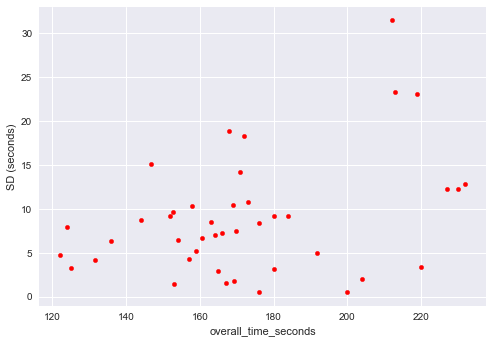

In [163]:
df.plot(kind='scatter',x='overall_time_seconds',y='SD (seconds)')